# LGBTQ+ Representation in Cartoons

Let's get gay, y'all

First, imports

In [1]:
import matplotlib.font_manager as mfm
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib import rcParams as rcp

In [2]:
mfm.fontManager.addfont('/Library/Fonts/VT323-Regular.ttf')

rcp['font.family'] = 'VT323'
rcp.update({'font.size': 24})

## Shows

This data set actually has two CSV files; one for shows with queer characters, and one for specific characters from each show. First let's pull in show data.

In [3]:
shows = pd.DataFrame(pd.read_csv('./20220601-LGBTQ-cartoons-series-information-v3.csv'))
shows.head()

,ID,show_title,TV_rating,IMDB_total_votes,IMDB_rating,seasons,total_episodes,start_date,end_date,duration,network,genre
0,tt7736544,3Below: Tales of Arcadia,TV-Y7,5776,7.7,2,26,12/21/2018,7/12/2019,203,Netflix,"action, adventure, comedy, family, fantasy, sc..."
1,tt1305826,Adventure Time,TV-PG,86837,8.6,10,282,4/5/2010,7/20/2018,2839,Cartoon Network,"action, adventure, comedy, family, fantasy, sc..."
2,tt11165358,Adventure Time: Distant Lands,TV-PG,3322,8.7,1,4,6/25/2020,9/2/2021,434,HBO Max,"action, adventure, comedy, family, fantasy, sc..."
3,tt1790914,Allen Gregory,TV-14,3442,4.1,1,7,10/30/2011,12/18/2011,49,Fox,comedy
4,tt0397306,American Dad!,TV-14,123144,7.3,19,322,2/6/2005,NaN,6201,Fox,comedy


In [4]:
shows.columns

Index(['ID', 'show_title', 'TV_rating', 'IMDB_total_votes', 'IMDB_rating',
       'seasons', 'total_episodes', 'start_date', 'end_date', 'duration',
       'network', 'genre'],
      dtype='object')

Most of this data has been pulled from IMDB, and is relatively easy to read. 

`ID` refers to the unique ID given to each entry on IMDB.

`show_title` is the name of the show.

`TV_rating` refers to the content rating given to each show in the little box at the top corner of each new episode (TV-G, TV-14, TV-PG, etc.).

`IMDB_total_votes` counts the number of ratings a program has received on IMDB.

`IMDB_rating` is the average user rating of a show on IMDB, on a scale from 1 to 10. These ratings don't have much bearing on the shows themselves as far as representation goes, but they could be useful indicators on popularity and general reception.

`total_episodes` is the number of episodes that a show has aired.

`start_date` and `end_date` represent when a show began and ended. Some `end_date` values are null, indicating the show is still on going as of the creation of this dataset.

`duration` is the number of days a show was on the air (shows with a 0 are ongoing).

`network` is the channel(s) or service(s) on which the show was originally broadcast.

`genre` includes the genre labels the show is listed under. Some shows will have multiple genres, others may only have one.

Now that we have that out of the way, let's rename our columns to be a little more readable before filtering out the data we don't need.

In [5]:
shows.columns = ['IMDB ID', 'Show', 'Rating', 'IMDB Votes', 'IMDB Rating', 'Seasons', 'Episodes', 'Premiere', 'Finale', 'Duration', 'Network', 'Genres']

`IMDB ID` is not relevant to what we'll be looking at, so we will drop that column. `Duration` will also be dropped, because it's a rather strange metric to include. Considering not all shows put out episodes at the same rate over the same time periods, and we already have `total_episodes`, `start_date` and `end_date`, this value is not as important to us.

We're going to fill any `NaN` values in `Finale` with "Ongoing", as these shows are still ongoing.

In [6]:
shows = shows.set_index('Show').drop(['IMDB ID', 'Duration'], axis=1)
shows['Finale'] = shows['Finale'].fillna('Ongoing')

After all of our formatting and reduction, we are left with...

In [7]:
shows

,Rating,IMDB Votes,IMDB Rating,Seasons,Episodes,Premiere,Finale,Network,Genres
Show,,,,,,,,,
3Below: Tales of Arcadia,TV-Y7,5776,7.7,2,26,12/21/2018,7/12/2019,Netflix,"action, adventure, comedy, family, fantasy, sc..."
Adventure Time,TV-PG,86837,8.6,10,282,4/5/2010,7/20/2018,Cartoon Network,"action, adventure, comedy, family, fantasy, sc..."
Adventure Time: Distant Lands,TV-PG,3322,8.7,1,4,6/25/2020,9/2/2021,HBO Max,"action, adventure, comedy, family, fantasy, sc..."
Allen Gregory,TV-14,3442,4.1,1,7,10/30/2011,12/18/2011,Fox,comedy
American Dad!,TV-14,123144,7.3,19,322,2/6/2005,Ongoing,Fox,comedy
...,...,...,...,...,...,...,...,...,...
Twelve Forever,TV-Y7,643,6.4,1,25,7/29/2019,7/29/2019,Netflix,"action, adventure, comedy, family, fantasy"
Victor and Valentino,TV-Y7,663,6.2,3,94,3/30/2019,Ongoing,Cartoon Network,"adventure, comedy, family, fantasy, mystery, s..."
Voltron: Legendary Defender,TV-Y7,8504,8.0,8,78,6/10/2016,12/14/2018,Netflix,"action, adventure, comedy, drama, family, fant..."


---

## Characters

In [8]:
characters = pd.DataFrame(pd.read_csv('./20220601-LGBTQ-character-demographics-v3.csv'))
characters.head()

,ID,show_title,confirmation_date,character_name,race,gender,orientation,role,representation
0,tt7736544,3Below: Tales of Arcadia,7/12/2019,Shannon Longhannon,White,Cis Woman,Lesbian,Recurring Character,Explicit
1,tt1305826,Adventure Time,5/17/2010,Princess Bubblegum,NaN,Cis Woman,Undetermined,Recurring Character,Explicit
2,tt1305826,Adventure Time,4/5/2010,Marceline the Vampire Queen,NaN,Cis Woman,Undetermined,Recurring Character,Explicit
3,tt1305826,Adventure Time,4/26/2010,BMO,NaN,Agender,Undetermined,Recurring Character,Explicit
4,tt11165358,Adventure Time: Distant Lands,6/25/2020,Y5,NaN,Cis Woman,Ambiguous,Recurring Character,Implicit


In [9]:
characters.columns

Index(['ID', 'show_title', 'confirmation_date', 'character_name', 'race',
       'gender', 'orientation', 'role', 'representation'],
      dtype='object')

Some of the data here is identical to the show set, so we'll take a look at what's new here.

`confirmation_date` is the date which a character was officially confirmed to be queer.

`character_name` is the name of the character in question.

`race` denotes a character's race, if applicable.

`gender` denotes a character's gender identity.

`orientation` denotes a character's sexual orientation.

`role` identifies if a character was a main, recurring, or guest character.

`representation` refers to whether a show explicitly or implicitly refers to a character's LGBTQ identification.

In [10]:
characters.columns = ['IMDB ID', 'Show', 'Confirmation Date', 'Character', 'Race', 'Gender', 'Orientation', 'Role', 'Representation']

Once again, we have no use for `IMDB ID`, so it will be dropped. `Race` values listed as "NaN" will be filled with "N/a" to denote that a character's race is unknown or irrelevent.

In [11]:
characters = characters.set_index('Character').drop(['IMDB ID'], axis=1)
characters['Race'] = characters['Race'].fillna('N/a')

We are now left with...

In [12]:
characters

,Show,Confirmation Date,Race,Gender,Orientation,Role,Representation
Character,,,,,,,
Shannon Longhannon,3Below: Tales of Arcadia,7/12/2019,White,Cis Woman,Lesbian,Recurring Character,Explicit
Princess Bubblegum,Adventure Time,5/17/2010,N/a,Cis Woman,Undetermined,Recurring Character,Explicit
Marceline the Vampire Queen,Adventure Time,4/5/2010,N/a,Cis Woman,Undetermined,Recurring Character,Explicit
BMO,Adventure Time,4/26/2010,N/a,Agender,Undetermined,Recurring Character,Explicit
Y5,Adventure Time: Distant Lands,6/25/2020,N/a,Cis Woman,Ambiguous,Recurring Character,Implicit
...,...,...,...,...,...,...,...
Bart Allen,Young Justice,6/2/2012,White,Cis Man,Gay,Recurring Character,Explicit
Ed Dorado Jr.,Young Justice,5/26/2012,POC,Cis Man,Gay,Recurring Character,Implicit
Marie Logan,Young Justice,11/26/2010,White,Cis Woman,Lesbian,Guest Character,Implicit


---

## Character count

While we can easily sort characters by their show, it will be nice to have a hard count per show on hand, so let's set that up, and add it to `shows`.

In [13]:
character_count = pd.DataFrame(characters[['Show']].value_counts().sort_index(ascending = True))
character_count

,0
Show,
3Below: Tales of Arcadia,1
Adventure Time,3
Adventure Time: Distant Lands,1
Allen Gregory,2
American Dad!,3
...,...
Victor and Valentino,1
Voltron: Legendary Defender,3
W.I.T.C.H.,3


In [14]:
shows = pd.merge(shows, character_count, on="Show")

In [15]:
shows.rename(columns = {0: 'LGBT Characters'},
            inplace = True)

In [16]:
showNames = shows.index.values
characterCount = shows['LGBT Characters']

Here we graph out each show, and how many queer characters are present

In [17]:
def totalCharsPerShow():
    plt.figure(figsize=(60,10))
    plt.bar(showNames, characterCount, width = 0.5)

    plt.xlabel("Show")
    plt.xticks(rotation=-90)
    plt.margins(x=0.01)
    plt.ylabel("No. of LGBT characters")
    plt.yticks(range(min(characterCount), max(characterCount + 1), 1))
    plt.title("Number of LGBT characters in American cartoons")
    plt.show()

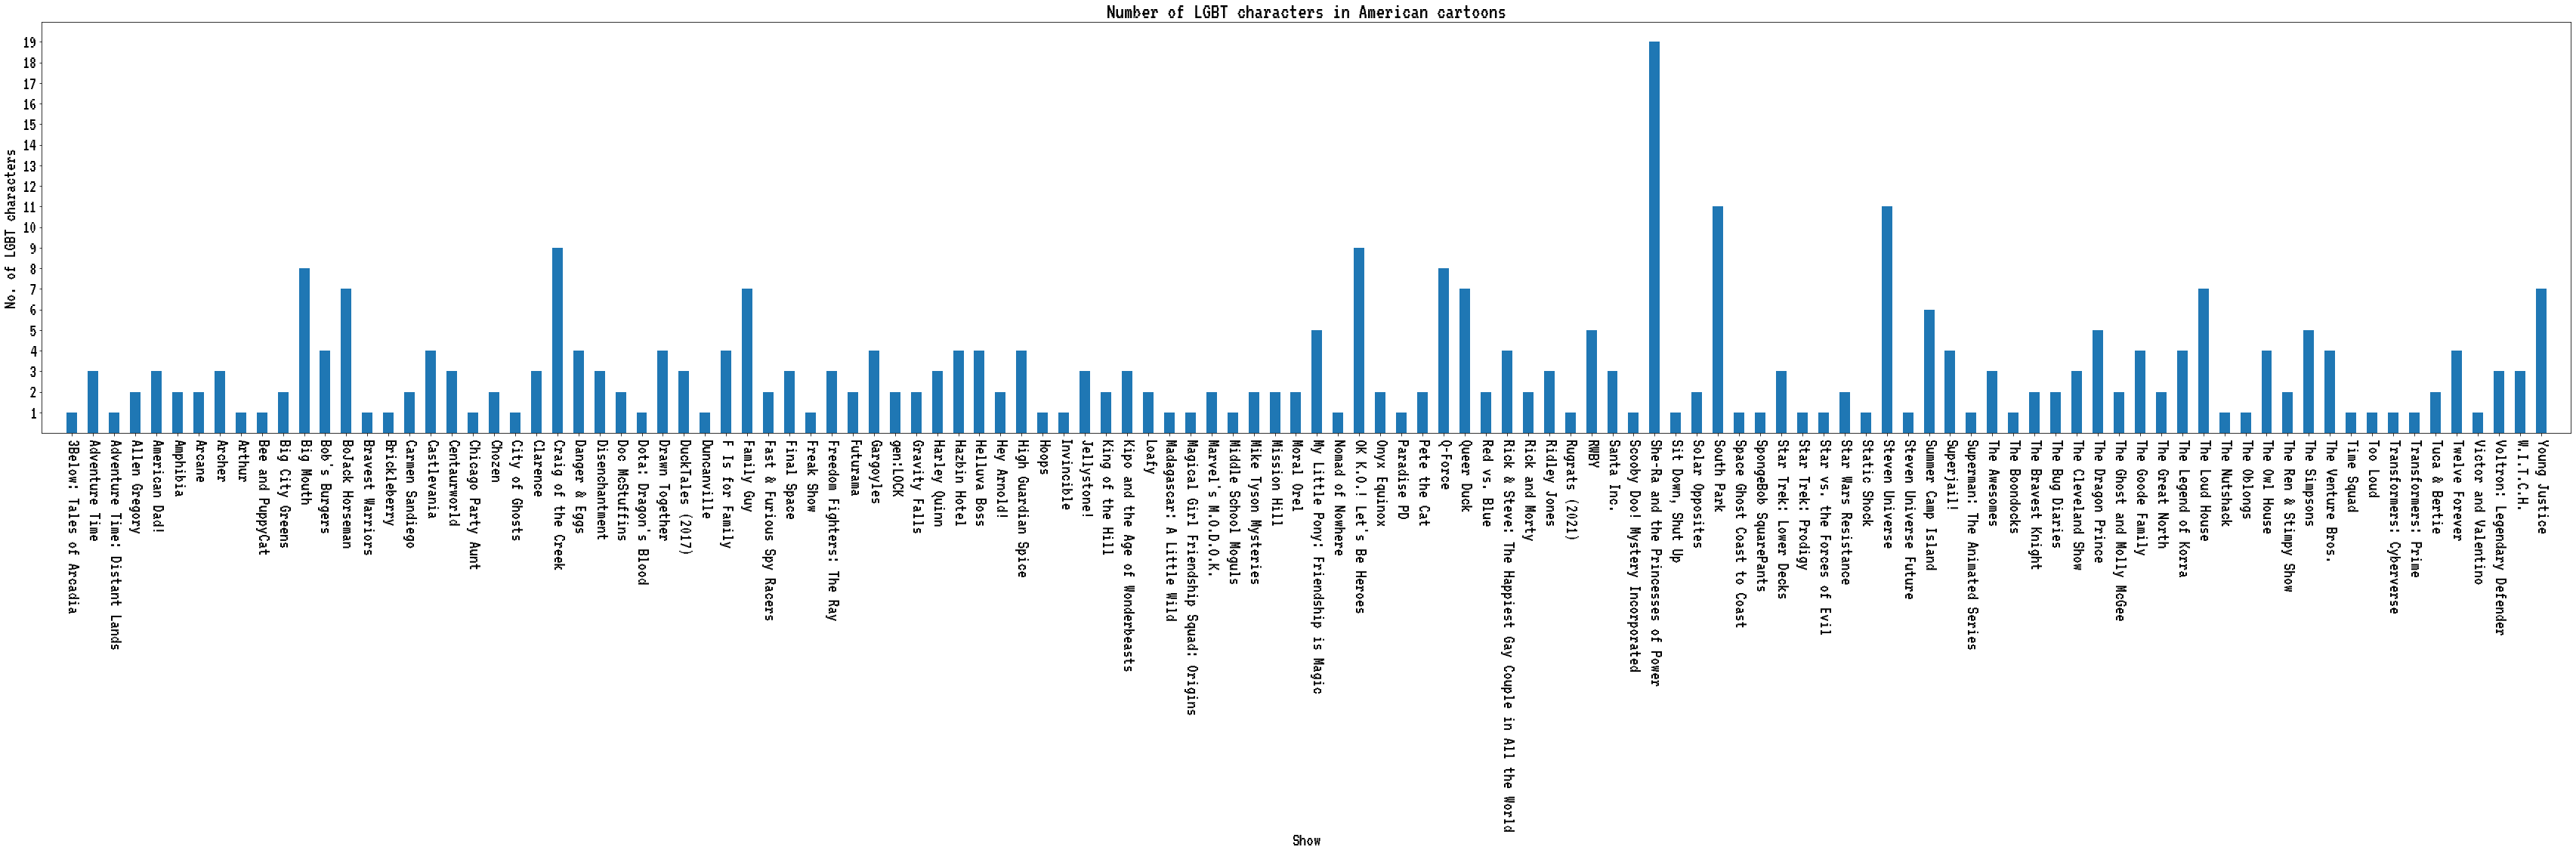

In [18]:
totalCharsPerShow()

That's... one big graph. Let's go ahead and break things down and see what we can find.

Let's start by picking the shows with the highest LGBTQ+ representation.

In [19]:
topTen_characters = pd.DataFrame(shows).sort_values(by = ['LGBT Characters'], ascending = False)[:10]
topTen_characters.drop(topTen_characters.iloc[:, 0:9], inplace = True, axis = 1)
topTen_characters

,LGBT Characters
Show,
She-Ra and the Princesses of Power,19
Steven Universe,11
South Park,11
Craig of the Creek,9
OK K.O.! Let's Be Heroes,9
Big Mouth,8
Q-Force,8
Young Justice,7
The Loud House,7


In [20]:
def topTenChars():
    plt.figure(figsize=(20,10))
    plt.barh(topTen_characters.index, topTen_characters['LGBT Characters'])
    plt.gca().invert_yaxis()
    plt.xlabel('No. of LGBT Characters')
    plt.xticks(range(0, max(topTen_characters['LGBT Characters'] + 1), 1))
    plt.ylabel('Shows')
    plt.title('10 shows with the highest LGBTQ+ representation')
    plt.show()

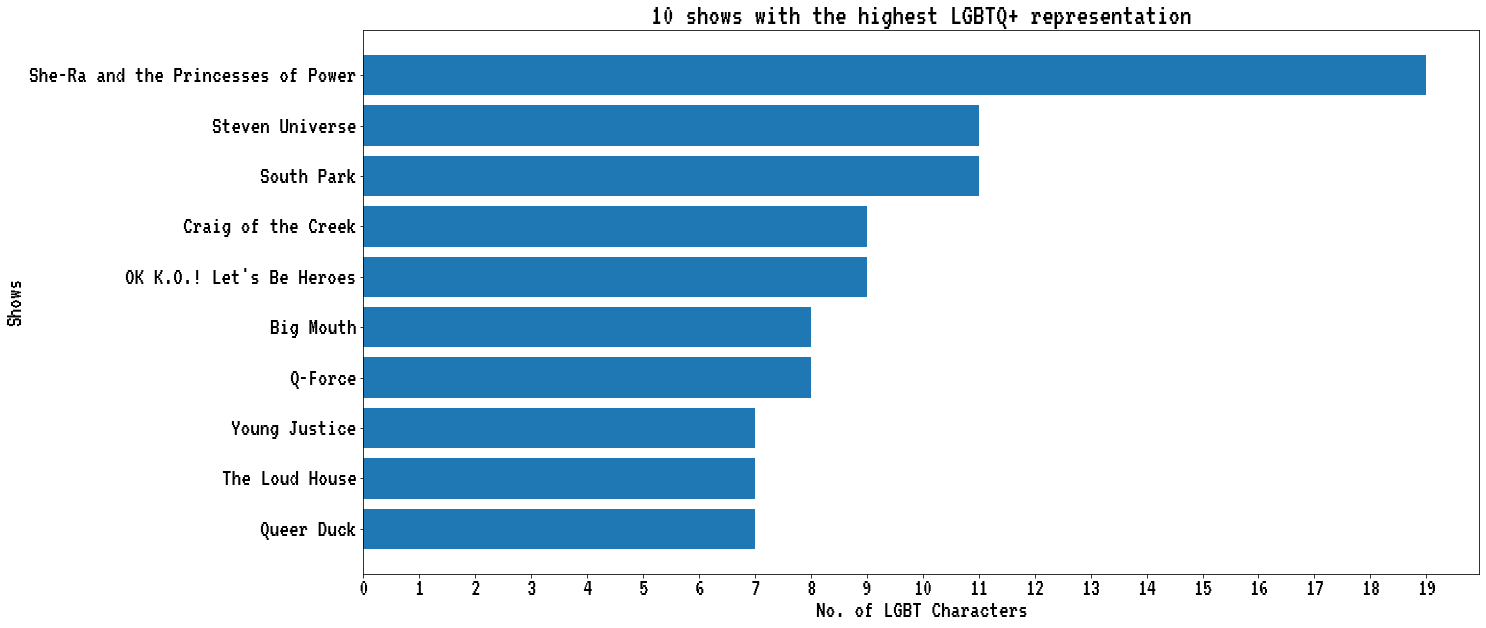

In [21]:
topTenChars()

We see here that She-Ra and the Princesses of Power has the highest LGBT representation out of any of the shows present, by a significant margin. So let's take a closer look

---

## She-Ra

Let's make a new dataframe that is just characters from She-Ra.

In [22]:
she_ra_df = pd.DataFrame(characters.loc[(characters['Show'] == 'She-Ra and the Princesses of Power')])
she_ra_df.drop(['Show'], axis=1)

,Confirmation Date,Race,Gender,Orientation,Role,Representation
Character,,,,,,
George,4/26/2019,POC,Cis Man,Gay,Guest Character,Explicit
Kyle,11/13/2018,White,Cis Man,Gay,Recurring Character,Explicit
Lance,4/26/2019,POC,Cis Man,Gay,Guest Character,Explicit
Bow,11/13/2018,POC,Cis Man,Bisexual,Main Character,Implicit
Rogelio,11/13/2018,N/a,Cis Man,Gay,Recurring Character,Explicit
Sea Hawk,11/13/2018,White,Cis Man,Queer,Recurring Character,Implicit
Falcon,5/15/2020,White,Cis Man,Queer,Guest Character,Implicit
Scorpia,11/13/2018,POC,Cis Woman,Lesbian,Supporting Character,Explicit
Netossa,11/13/2018,POC,Cis Woman,Lesbian,Recurring Character,Explicit


Let's go ahead and count up each qualitative value.

In [23]:
she_ra_race = she_ra_df['Race'].value_counts()
she_ra_gender = she_ra_df['Gender'].value_counts()
she_ra_orientation = she_ra_df['Orientation'].value_counts()
she_ra_role = she_ra_df['Role'].value_counts()
she_ra_representation = she_ra_df['Representation'].value_counts()

In [24]:
def she_ra_pies():
    fig1 = plt.figure(figsize=(25,10))

    ax1 = plt.subplot2grid((2,3),(0,0))
    plt.pie(she_ra_race, labels=she_ra_race.index, autopct='%1.1f%%', shadow=True, radius=1)
    plt.title('Race')

    ax2 = plt.subplot2grid((2,3),(0,1))
    plt.pie(she_ra_gender, labels=she_ra_gender.index, autopct='%1.1f%%', shadow=True, radius=1)
    plt.title('Gender')

    ax3 = plt.subplot2grid((2,3),(0,2))
    plt.pie(she_ra_orientation, labels=she_ra_orientation.index, autopct='%1.1f%%', shadow=True, radius=1)
    plt.title('Orientation')

    fig2 = plt.figure(figsize=(25,10))

    ax1 = plt.subplot2grid((2,3),(1,0))
    plt.pie(she_ra_role, labels=she_ra_role.index, autopct='%1.1f%%', shadow=True, radius=1)
    plt.title('Role')

    ax2 = plt.subplot2grid((2,3),(1,2))
    plt.pie(she_ra_representation, labels=she_ra_representation.index, autopct='%1.1f%%', shadow=True, radius=1)
    plt.title('Representation')

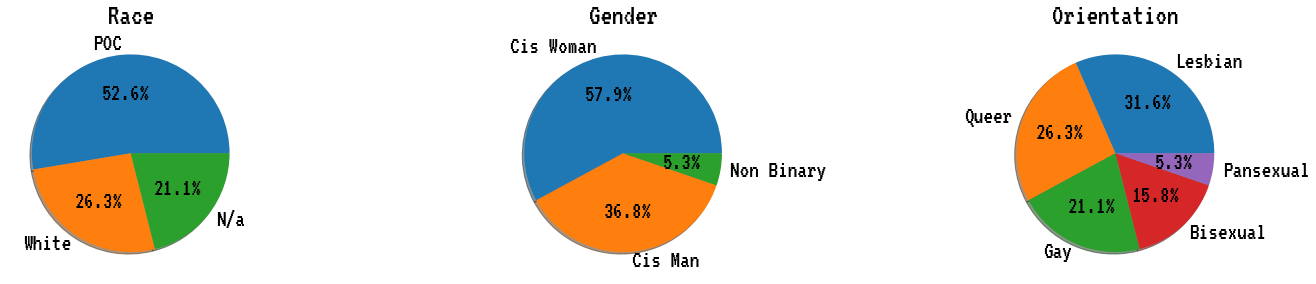

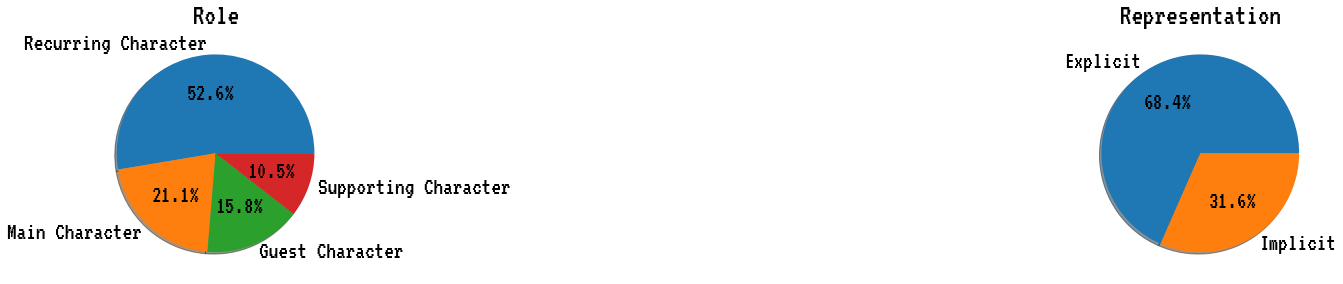

In [25]:
she_ra_pies()